# Mini-Project 1 - Classification

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Sara Hamed Mohamed Ali

ID: 43-4191

Tutorial: BI T1

---

Name: Shams El Din El Khaitb

ID: 43-14660

Tutorial: BI T1

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/telecom_churn.csv')

## Data Inspection & Cleaning (if any)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [ ]:
df['MonthlyCharges']= [df['MonthlyCharges'][i].replace('/m','') for i in range(len(df['MonthlyCharges']))]
df['MonthlyCharges']= [df['MonthlyCharges'][i].replace('$','') for i in range(len(df['MonthlyCharges']))]
df['MonthlyCharges']= df['MonthlyCharges'].astype(float)
df['TotalCharges']= [df['MonthlyCharges'][i]*df['tenure'][i] for i in range(len(df['TotalCharges']))]
df['TotalCharges']= df['TotalCharges'].astype(float)
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)
df['MultipleLines']= [df['MultipleLines'][i].replace('No phone service', 'No') for i in range(len(df['MonthlyCharges']))]
df['OnlineSecurity']= [df['OnlineSecurity'][i].replace('No internet service', 'No') for i in range(len(df['OnlineSecurity']))]
df['OnlineBackup']= [df['OnlineBackup'][i].replace('No internet service', 'No') for i in range(len(df['OnlineBackup']))]
df['TechSupport']= [df['TechSupport'][i].replace('No internet service', 'No') for i in range(len(df['TechSupport']))]
df['DeviceProtection']= [df['DeviceProtection'][i].replace('No internet service', 'No') for i in range(len(df['DeviceProtection']))]
df['StreamingTV']= [df['StreamingTV'][i].replace('No internet service', 'No') for i in range(len(df['StreamingTV']))]
df['StreamingMovies']= [df['StreamingMovies'][i].replace('No internet service', 'No') for i in range(len(df['StreamingMovies']))]
df= df.drop('customerID', axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,2035.20,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7430.40,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,325.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,297.60,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Exploratory Data Analysis

**Q0 (example): How long do churned customers stay with the company before leaving?**

In [ ]:
df.loc[df['Churn'] == 'Yes', 'tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

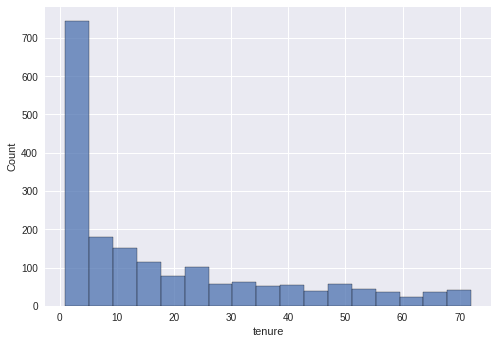

In [ ]:
sns.histplot(x='tenure', data=df[df['Churn'] == 'Yes']);

*Example Note: A histogram was chosen to show the distribution of tenure of churned customers. Alternatively, a violin plot or a box plot may also be used.*

**Answer**: 75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.

**Q1: What are the most correlated attributes with customer churn?**

In [ ]:
#The most correlated attributes with customer churn are Contract and Tenure. It can be seen below that that both attributes are the closest (they are negatively correlated). This is shown by
#the printed corr function for Churn and the displayed heatmap.

In [ ]:
df_le = df.copy()

categorical_columns = df.select_dtypes(include= [object, 'category'])

for column in categorical_columns:
         df_le[column] = df_le[column].astype('category').cat.codes

df_le

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1936.30,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,107.70,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1903.50,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,141.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,2035.20,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7430.40,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,325.60,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,297.60,1


In [ ]:
plt.figure(figsize=(30,30))

corr = df_le.corr()
corr

corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())

Churn               1.000000
Contract           -0.396713
tenure             -0.352229
TotalCharges       -0.198514
MonthlyCharges      0.193356
PaperlessBilling    0.191825
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
SeniorCitizen       0.150889
Partner            -0.150448
PaymentMethod       0.107062
OnlineBackup       -0.082255
DeviceProtection   -0.066160
StreamingTV         0.063228
StreamingMovies     0.061382
InternetService    -0.047291
MultipleLines       0.040102
PhoneService        0.011942
gender             -0.008612
Name: Churn, dtype: float64

<Figure size 2160x2160 with 0 Axes>

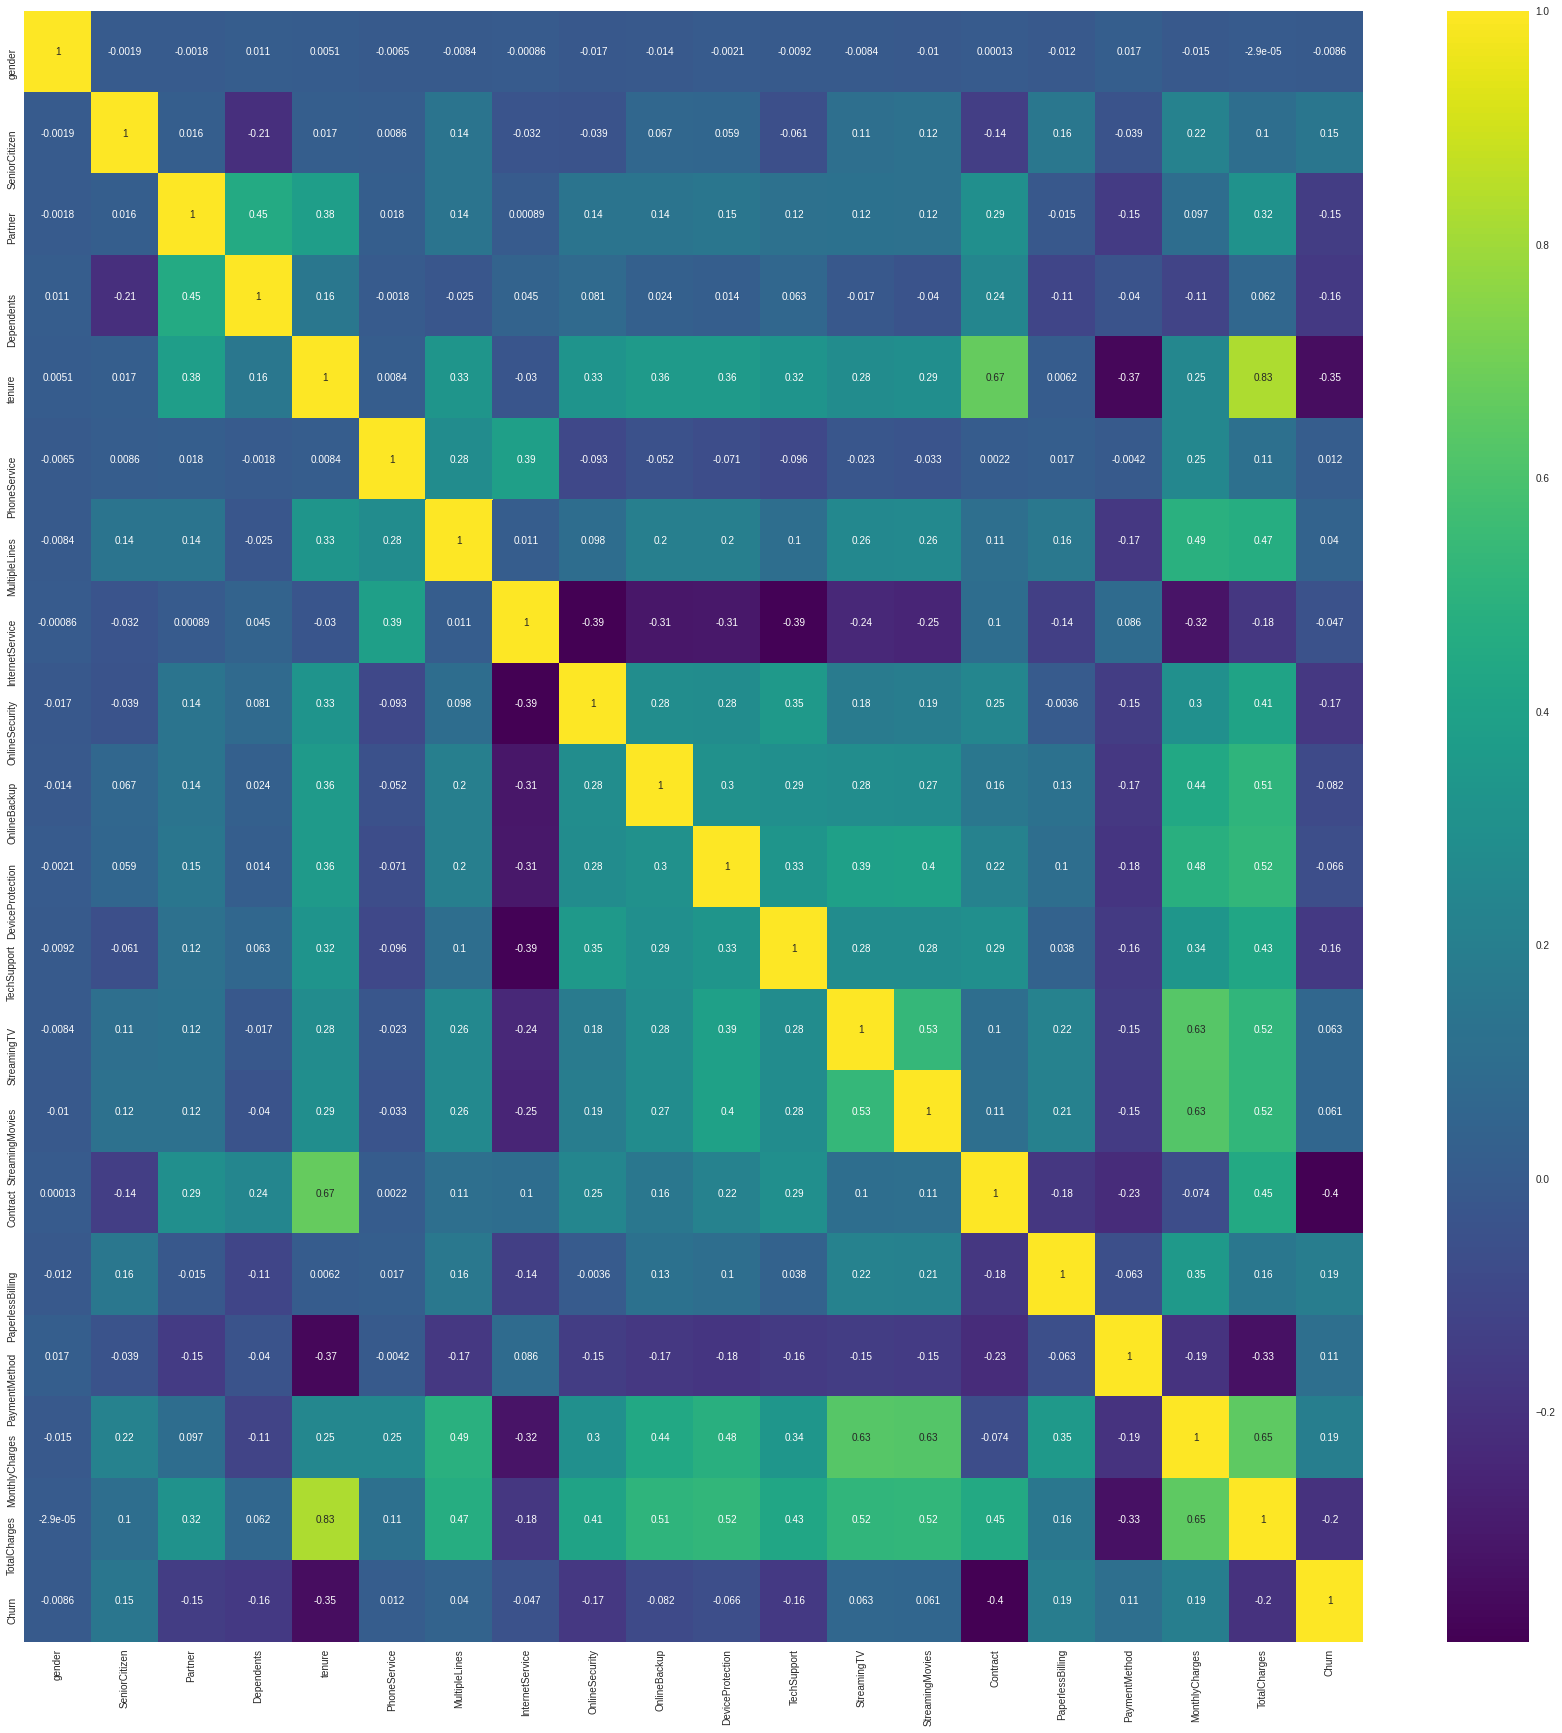

In [ ]:
plt.figure(figsize=(30,30))

sns.heatmap(corr, cmap='viridis', annot=True)

**Q2: Are senior citizens more likely to churn than non-senior citizens?**

In [ ]:
#Yes, according to the figure below, Senior citizens are more likely to churn than Non-senior citizens.

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


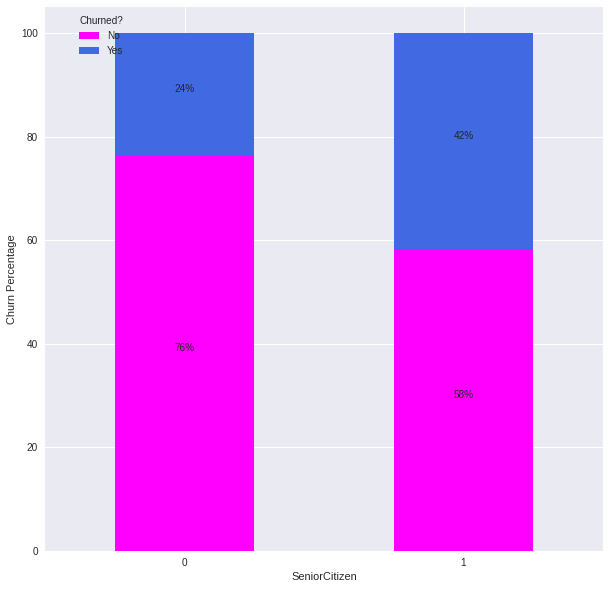

In [ ]:
ax= pd.crosstab(df['SeniorCitizen'], df['Churn']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0, color= ['magenta','royalblue'])
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Churned?")

plt.xlabel('SeniorCitizen')
plt.ylabel('Churn Percentage')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()

**Q3: Which payment method has the highest churn rate?**

In [ ]:
#According to the figures below, the Electronic Check payment method has the highest churn rate.

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


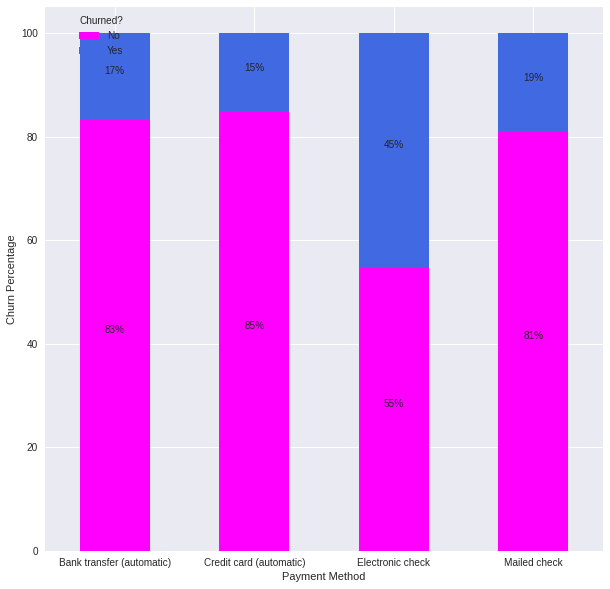

In [ ]:
ax= pd.crosstab(df['PaymentMethod'], df['Churn']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0, color= ['magenta','royalblue'])
display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Churned?")

plt.xlabel('Payment Method')
plt.ylabel('Churn Percentage')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
    
plt.show()

<Figure size 2160x2160 with 0 Axes>

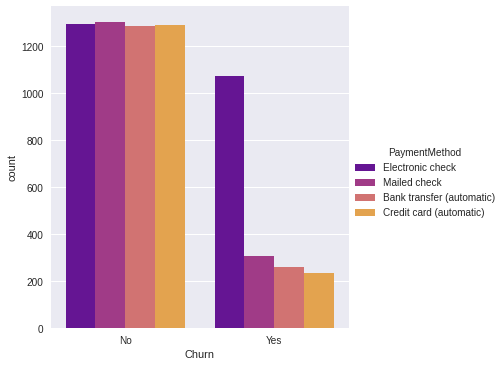

In [ ]:
plt.figure(figsize=(30,30))
sns.catplot(x='Churn', kind='count', hue='PaymentMethod', palette='plasma', data=df);

## Modelling

In [ ]:
#In order to properly model the data, we had to label-encode the Churn and One-hot encode the rest of the categorical variables for the algorithm to be able to read the values.
#training sets and testing sets were made and fitted to the model.
#Logistic Regression was used due to having more than one independent categorical variable and one binary dependent variable.

In [ ]:
df_le2 = df.copy()

categorical_columns = df_le2.select_dtypes(include= [object, 'category'])

for column in categorical_columns:
         df_le2['Churn'] = df_le2['Churn'].astype('category').cat.codes

df_le2.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,797.20,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1960.20,0
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,297.50,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,2934.40,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3481.30,0


In [ ]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn']

Number of rows and columns in the dataset: (7043, 20)

Columns in data frame after encoding dummy variable:
 ['tenure' 'MonthlyCharges' 'TotalCharges' 'Churn' 'gender_Male'
 'SeniorCitizen_1' 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'MultipleLines_Yes' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_Yes' 'OnlineBackup_Yes' 'DeviceProtection_Yes'
 'TechSupport_Yes' 'StreamingTV_Yes' 'StreamingMovies_Yes'
 'Contract_One year' 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']

Number of rows and columns in the dataset: (7043, 24)


In [ ]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('Churn',axis=1) # Independent variable
y = df_le2['Churn'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 5634
Testing dataset size: 1409


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=1562)

logistic_reg.fit(x_train, y_train);

## Evaluation

In [ ]:
#The model is considered to have an "Ok" performance according to the two performance metrics used (Mean Squared Error & R^2).
#The Mean Squared Error of 0.2 is considered to be minimal
#The R^2 of 0.798 is closer to 1 than it is to 0 implying "Ok" performance
#the .score() method was also used to evaluate the model, and it is apparent to be using the R^2 as well.
#Both the Mean Squared Error and the R^2 Methods are viable testing methods for the logistic regression, since the Mean Squared Error is the average squaring of errors (the larger the number, the larger the errors)
#and the R^2 Method is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Meaning that the closer it is to 1 (100%), the more correlated the variables
#Therefore, both methods should be taken into consideration when evaluating the logistic regression model.

In [ ]:
# sklearn regression module
y_pred_sk = logistic_reg.predict(x_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = logistic_reg.score(x_test,y_test)
print('The Mean Square Error(MSE) or J(beta) is: ', J_mse_sk)
print('R square obtain for scikit learn library is :', R_square_sk)

The Mean Square Error(MSE) or J(beta) is:  0.20156139105748758
R square obtain for scikit learn library is : 0.7984386089425124


In [ ]:
logistic_reg.score(x_test, y_test)

0.7984386089425124

## Bonus (Optional)

In [ ]:
#Two other classification algorithms were tried (KNN & Naive Bayes).
#Both algorithms were evaluated using the same test data sets as the logisitic regression model above.
#The .score() method was also used to evaluate both algorithms
#The KNN model is evaluated by the .score() method using the F1-score to take percision and recall into consideration
#We also used a classification report and confusion matrix to evaluate the KNN using the f1-score, and identified in the graph below that the least error is when the number of neighbours (K value) is 12
#The GaussianNB model can be evaluated using the cross validation method.
#It also proved useful in the GaussianNB evaluation to show the number of mislabeled points
#according to the .score() method the logistic regression showed the best performance, and therefore it was selected to mainly use.
#The secondary option to use would be the KNN as it proved to perform better according to the .score() method.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_sk = knn_model.predict(x_test)
print(confusion_matrix(y_test, y_pred_sk))
print(classification_report(y_test, y_pred_sk))

[[901 139]
 [209 160]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1040
           1       0.54      0.43      0.48       369

    accuracy                           0.75      1409
   macro avg       0.67      0.65      0.66      1409
weighted avg       0.74      0.75      0.74      1409



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

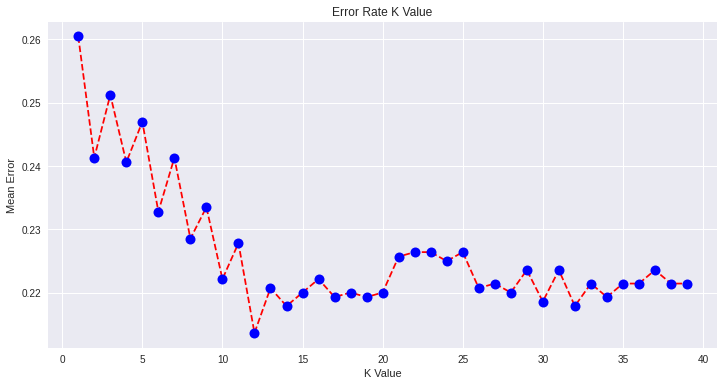

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')  

In [ ]:
knn_model.score(x_test,y_test)

0.7530163236337828

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1409 points : 364


In [ ]:
nb_model.score(x_test, y_test)

0.7416607523066004